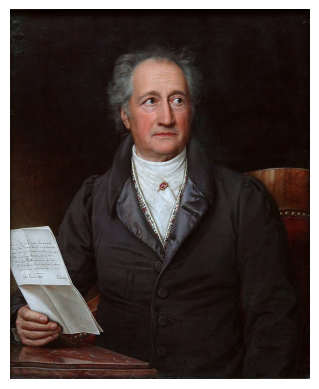

In [28]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os

image = imread('Goethe.jpg')
matrix_representation = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.show()


In [43]:
R = matrix_representation[:, :, 0]
G = matrix_representation[:, :, 1]
B = matrix_representation[:, :, 2]

print(matrix_representation.shape)

(789, 640, 3)


In [52]:
# Get the SVD components of each color channel

RU, RS, RVt = np.linalg.svd(R)
GU, GS, GVt = np.linalg.svd(G)
BU, BS, BVt = np.linalg.svd(B)

RSigma = np.zeros((RU.shape[0], RVt.shape[0]))
np.fill_diagonal(RSigma, RS)
GSigma = np.zeros((GU.shape[0], GVt.shape[0]))
np.fill_diagonal(GSigma, GS)
BSigma = np.zeros((BU.shape[0], BVt.shape[0]))
np.fill_diagonal(BSigma, BS)

In [62]:
# We can see here that the norm is zero

R_reconstructed = RU @ RSigma @ RVt
G_reconstructed = GU @ GSigma @ GVt
B_reconstructed = BU @ BSigma @ BVt



# An example using the red color channel
difference_matrix = R - R_reconstructed
frobenius_norm = np.linalg.norm(difference_matrix)

# The difference is zero therefore the matrices are the same
print(f'The frobenius_norm for the red color channel is {frobenius_norm:.2f}')

The frobenius_norm for the red color channel is 0.00


In [66]:
def dim_reduce(A, reduction):
    A[reduction:, reduction:] = 0
    return A

# A little example

little_matrix = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]])
reduced_matrix = dim_reduce(little_matrix, 2)

print(little_matrix)
print(reduced_matrix)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [64]:
# Now we use Principle Component Analysis!!!
restacked_matrix = np.stack((R_reconstructed, G_reconstructed, B_reconstructed), axis=-1)

(789, 640, 3)

In [ ]:
reduced_RSigma = dim_reduce(RSigma, 10)
reduced_GSigma = dim_reduce(GSigma, 10)
reduced_BSigma = dim_reduce(BSigma, 10)

